<a href="https://colab.research.google.com/github/pkams/projetos_iniciais/blob/master/prototipoSegClientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd


In [0]:
df = pd.read_csv('estaticos_market.csv')

In [6]:
df.head()

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,...,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,False,False,2005-03-25,False,True,True,SIM,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,False,False,False,NaN,NaN,NaN,NaN,True,8.0,0.0,0.0,NaN,NaN,NaN,False,RN,VERDE,ACIMA DE 1 ANO,...,3132172.8,3132172.8,119.0,26.0,100.0,0.0,NaN,1.0,4.0,6.0,5.0,3.0,4.0,2.0,NaN,1.0,NaN,1.0,25.0,NaN,NaN,26.0,19.166667,0.0,0.0,119.0,145.0,13.309195,93.266667,-0.933333,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0.0
1,1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,False,False,True,False,2017-05-12,False,True,True,SIM,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,PI,CINZA,ATE 1 ANO,...,210000.0,210000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,False,False,True,False,2011-09-26,False,False,True,SIM,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,False,False,False,NaN,NaN,NaN,NaN,True,NaN,0.0,0.0,NaN,NaN,NaN,True,AM,AMARELO,ACIMA DE 1 ANO,...,50000.0,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,False,False,False,False,2012-04-25,False,True,True,SIM,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,OUTRAS ATIVIDADES DE SERVICOS,False,False,False,NaN,NaN,NaN,NaN,True,NaN,0.0,0.0,NaN,NaN,NaN,False,AM,AMARELO,ACIMA DE 1 ANO,...,210000.0,210000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,False,False,False,False,2015-08-17,False,True,True,SIM,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,False,False,False,NaN,NaN

In [7]:
df.shape

(401870, 182)

In [0]:
df2 = df.fillna(0)
df2 = df2.drop('Unnamed: 0', axis = 1)
df2 = df2.set_index('id')

In [9]:
df2.head()

,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,...,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,False,False,2005-03-25,False,True,True,SIM,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,False,False,False,0.0,0.0,0.0,0.0,True,8.0,0.0,0.0,0.0,0.0,0.0,False,RN,VERDE,ACIMA DE 1 ANO,23.0,ALTA,...,3132172.8,3132172.8,119.0,26.0,100.0,0.0,0.0,1.0,4.0,6.0,5.0,3.0,4.0,2.0,0.0,1.0,0.0,1.0,25.0,0.0,0.0,26.0,19.166667,0.0,0.0,119.0,145.0,13.309195,93.266667,-0.933333,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0.0
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,False,False,True,False,2017-05-12,False,True,True,SIM,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,False,False,False,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,PI,CINZA,ATE 1 ANO,9.0,BAIXA,...,210000.0,210000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,False,False,True,False,2011-09-26,False,False,True,SIM,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,False,False,False,0.0,0.0,0.0,0.0,True,0.0,0.0,0.0,0.0,0.0,0.0,True,AM,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,...,50000.0,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,False,False,False,False,2012-04-25,False,True,True,SIM,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,OUTRAS ATIVIDADES DE SERVICOS,False,False,False,0.0,0.0,0.0,0.0,True,0.0,0.0,0.0,0.0,0.0,0.0,False,AM,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,...,210000.0,210000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1f9bcabc9d3173c1fe769899e4fac14b05303

In [10]:
cat = df2.dtypes[(df2.dtypes == 'object')].index.tolist()
cat

['de_natureza_juridica',
 'sg_uf',
 'natureza_juridica_macro',
 'de_ramo',
 'setor',
 'idade_emp_cat',
 'dt_situacao',
 'fl_rm',
 'nm_divisao',
 'nm_segmento',
 'fl_spa',
 'fl_antt',
 'fl_veiculo',
 'fl_optante_simples',
 'fl_optante_simei',
 'sg_uf_matriz',
 'de_saude_tributaria',
 'de_saude_rescencia',
 'de_nivel_atividade',
 'de_indicador_telefone',
 'fl_simples_irregular',
 'nm_meso_regiao',
 'nm_micro_regiao',
 'fl_passivel_iss',
 'de_faixa_faturamento_estimado',
 'de_faixa_faturamento_estimado_grupo']

In [11]:
num = df2.dtypes[(df2.dtypes != 'bool') & (df2.dtypes != 'object')].index.tolist()
num

['idade_empresa_anos',
 'vl_total_tancagem',
 'vl_total_veiculos_antt',
 'vl_total_veiculos_leves',
 'vl_total_veiculos_pesados',
 'qt_art',
 'vl_total_veiculos_pesados_grupo',
 'vl_total_veiculos_leves_grupo',
 'vl_total_tancagem_grupo',
 'vl_total_veiculos_antt_grupo',
 'vl_potenc_cons_oleo_gas',
 'nu_meses_rescencia',
 'vl_frota',
 'empsetorcensitariofaixarendapopulacao',
 'qt_socios',
 'qt_socios_pf',
 'qt_socios_pj',
 'idade_media_socios',
 'idade_maxima_socios',
 'idade_minima_socios',
 'qt_socios_st_regular',
 'qt_socios_st_suspensa',
 'qt_socios_masculino',
 'qt_socios_feminino',
 'qt_socios_pep',
 'qt_alteracao_socio_total',
 'qt_alteracao_socio_90d',
 'qt_alteracao_socio_180d',
 'qt_alteracao_socio_365d',
 'qt_socios_pj_ativos',
 'qt_socios_pj_nulos',
 'qt_socios_pj_baixados',
 'qt_socios_pj_suspensos',
 'qt_socios_pj_inaptos',
 'vl_idade_media_socios_pj',
 'vl_idade_maxima_socios_pj',
 'vl_idade_minima_socios_pj',
 'qt_coligados',
 'qt_socios_coligados',
 'qt_coligados_matri

In [12]:
for categorias in cat:
  print('Num de categorias {} da coluna {}'.format(df2[categorias].nunique(),str(categorias)))

Num de categorias 66 da coluna de_natureza_juridica
Num de categorias 6 da coluna sg_uf
Num de categorias 7 da coluna natureza_juridica_macro
Num de categorias 33 da coluna de_ramo
Num de categorias 6 da coluna setor
Num de categorias 6 da coluna idade_emp_cat
Num de categorias 7195 da coluna dt_situacao
Num de categorias 2 da coluna fl_rm
Num de categorias 88 da coluna nm_divisao
Num de categorias 22 da coluna nm_segmento
Num de categorias 2 da coluna fl_spa
Num de categorias 2 da coluna fl_antt
Num de categorias 2 da coluna fl_veiculo
Num de categorias 2 da coluna fl_optante_simples
Num de categorias 2 da coluna fl_optante_simei
Num de categorias 28 da coluna sg_uf_matriz
Num de categorias 7 da coluna de_saude_tributaria
Num de categorias 6 da coluna de_saude_rescencia
Num de categorias 5 da coluna de_nivel_atividade
Num de categorias 3 da coluna de_indicador_telefone
Num de categorias 2 da coluna fl_simples_irregular
Num de categorias 20 da coluna nm_meso_regiao
Num de categorias 74

In [0]:
df2 = df2.drop('dt_situacao', axis = 1)

In [0]:
cat = df2.dtypes[(df2.dtypes == 'object')].index.tolist()

In [0]:
df2 = pd.get_dummies(df2, columns = cat)

In [0]:
index_num = df2[num].index

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df2_scaler = scaler.fit_transform(df2[num])
colunas_num = df2[num].columns

In [18]:
df2_scaler = pd.DataFrame(df2_scaler, columns=colunas_num, index=index_num)
df2_scaler

,idade_empresa_anos,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,nu_meses_rescencia,vl_frota,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,...,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,0.469092,-0.008642,-0.009671,-0.060197,-0.045806,2.530647,-0.049136,-0.040143,-0.011598,-0.012689,-0.017515,0.036551,-0.044505,-0.802756,0.306053,0.313148,-0.086681,0.673345,0.724370,0.601373,0.494382,-0.082267,0.733190,-0.506042,-0.045396,0.0,0.0,0.0,0.0,-0.085671,-0.008495,-0.01059,-0.005739,-0.012543,-0.077133,-0.076215,-0.074383,0.543064,0.255214,0.544587,...,0.075193,-0.045280,1.126063,-0.039240,3.492423,-0.318891,-0.025225,0.153956,0.661639,0.586502,0.326918,0.187634,0.259938,0.096474,-0.010398,0.037591,-0.019243,0.030588,0.385342,-0.016128,0.0,0.213964,0.155468,-0.05593,-0.054468,1.124796,0.730248,0.052726,0.186785,-0.080016,0.552808,0.651643,0.252942,0.213661,0.213901,0.202560,-0.007502,-0.015087,-0.153999,-0.061246
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,-0.882506,-0.008642,-0.009671,-0.060197,-0.045806,-0.025574,-0.049136,-0.040143,-0.011598,-0.012689,-0.017515,-1.148572,-0.044505,-0.384582,-0.042433,-0.037534,-0.086681,-0.078361,-0.117779,-0.036006,0.033833,-0.082267,0.220431,-0.506042,-0.045396,0.0,0.0,0.0,0.0,-0.085671,-0.008495,-0.01059,-0.005739,-0.012543,-0.077133,-0.076215,-0.074383,-0.085335,-0.062696,-0.085064,...,-0.017545,-0.045708,-0.062123,-0.039619,-0.351886,-0.318891,-0.025225,-0.038705,-0.065128,-0.047910,-0.032510,-0.026750,-0.020199,-0.013067,-0.010398,-0.009274,-0.019243,-0.024511,-0.028007,-0.016128,0.0,-0.025454,-0.158630,-0.05593,-0.054468,-0.062192,-0.048418,-0.126281,-0.112912,-0.063626,-0.154884,-0.134191,-0.114777,-0.025593,-0.025272,-0.027491,-0.007502,0.004429,-0.153999,-0.061246
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,-0.296899,-0.008642,-0.009671,-0.060197,-0.045806,-0.025574,-0.049136,-0.040143,-0.011598,-0.012689,-0.017515,0.290506,-0.044505,-0.166483,-0.042433,-0.037534,-0.086681,0.142729,0.092758,0.191629,-0.426717,11.015607,0.220431,-0.506042,-0.045396,0.0,0.0,0.0,0.0,-0.085671,-0.008495,-0.01059,-0.005739,-0.012543,-0.077133,-0.076215,-0.074383,-0.085335,-0.062696,-0.085064,...,-0.022623,-0.045732,-0.062123,-0.039619,-0.351886,-0.318891,-0.025225,-0.038705,-0.065128,-0.047910,-0.032510,-0

In [0]:
df2 = df2.drop(columns=num)

In [20]:
df3 = pd.concat([df2_scaler, df2], axis = 1)
df3

,idade_empresa_anos,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,nu_meses_rescencia,vl_frota,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,...,nm_micro_regiao_ROSARIO,nm_micro_regiao_SAO RAIMUNDO NONATO,nm_micro_regiao_SENA MADUREIRA,nm_micro_regiao_SERIDO OCIDENTAL,nm_micro_regiao_SERIDO ORIENTAL,nm_micro_regiao_SERRA DE SANTANA,nm_micro_regiao_SERRA DE SAO MIGUEL,nm_micro_regiao_TARAUACA,nm_micro_regiao_TEFE,nm_micro_regiao_TERESINA,nm_micro_regiao_UMARIZAL,nm_micro_regiao_VALE DO ACU,nm_micro_regiao_VALENCA DO PIAUI,fl_passivel_iss_False,fl_passivel_iss_True,de_faixa_faturamento_estimado_0,de_faixa_faturamento_estimado_ACIMA DE 1 BILHAO DE REAIS,"de_faixa_faturamento_estimado_ATE R$ 81.000,00","de_faixa_faturamento_estimado_DE R$ 1.500.000,01 A R$ 4.800.000,00","de_faixa_faturamento_estimado_DE R$ 10.000.000,01 A R$ 30.000.000,00","de_faixa_faturamento_estimado_DE R$ 100.000.000,01 A R$ 300.000.000,00","de_faixa_faturamento_estimado_DE R$ 30.000.000,01 A R$ 100.000.000,00","de_faixa_faturamento_estimado_DE R$ 300.000.000,01 A R$ 500.000.000,00","de_faixa_faturamento_estimado_DE R$ 360.000,01 A R$ 1.500.000,00","de_faixa_faturamento_estimado_DE R$ 4.800.000,01 A R$ 10.000.000,00","de_faixa_faturamento_estimado_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS","de_faixa_faturamento_estimado_DE R$ 81.000,01 A R$ 360.000,00",de_faixa_faturamento_estimado_SEM INFORMACAO,de_faixa_faturamento_estimado_grupo_0,de_faixa_faturamento_estimado_grupo_ACIMA DE 1 BILHAO DE REAIS,"de_faixa_faturamento_estimado_grupo_ATE R$ 81.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 1.500.000,01 A R$ 4.800.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 10.000.000,01 A R$ 30.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 100.000.000,01 A R$ 300.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 30.000.000,01 A R$ 100.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 300.000.000,01 A R$ 500.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 360.000,01 A R$ 1.500.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 4.800.000,01 A R$ 10.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS","de_faixa_faturamento_estimado_grupo_DE R$ 81.000,01 A R$ 360.000,00"
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,0.469092,-0.008642,-0.009671,-0.060197,-0.045806,2.530647,-0.049136,-0.040143,-0.011598,-0.012689,-0.017515,0.036551,-0.044505,-0.802756,0.306053,0.313148,-0.086681,0.673345,0.724370,0.601373,0.494382,-0.082267,0.733190,-0.506042,-0.045396,0.0,0.0,0.0,0.0,-0.085671,-0.008495,-0.01059,-0.005739,-0.012543,-0.077133,-0.076215,-0.074383,0.543064,0.255214,0.544587,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,-0.882506,-0.008642,-0.009671,-0.060197,-0.045806,-0.025574,-0.049136,-0.040143,-0.011598,-0.012689,-0.017515,-1.148572,-0.044505,-0.384582,-0.042433,-0.037534,-0.086681,-0.078361,-0.117779,-0.036006,0.033833,-0.082267,0.220431,-0.506042,-0.045396,0.0,0.0,0.0,0.0,-0.085671,-0.008495,-0.01059,-0.005739,-0.012543,-0.077133,-0.076215,-0.074383,-0.085335,-0.062696,-0.085064,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,

In [23]:
from sklearn.decomposition import PCA

pca = PCA(100)
pca.fit(df3)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

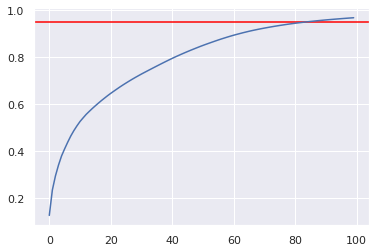

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()
plt.axhline(0.95, color='red')
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [0]:
# 80 componentes explicam 95% da variação!

In [0]:
from sklearn.decomposition import PCA

pca = PCA(80)
df_pca = pca.fit_transform(df3)

In [0]:
from sklearn.cluster import KMeans

k_list = range(1,11)
lista_k = []
lista_inertia = []
for i in k_list:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df_pca)
  lista_k.append(i)
  lista_inertia.append(kmeans.inertia_)

In [0]:
inertia = pd.DataFrame({'K':lista_k,'Inertia':lista_inertia})

In [39]:
inertia

,K,Inertia
0,1,5.617962e+07
1,2,5.120396e+07
2,3,4.643319e+07
3,4,4.363113e+07
4,5,4.089554e+07
5,6,3.892571e+07
6,7,3.748152e+07
7,8,3.617255e+07
8,9,3.470188e+07
9,10,3.451640e+07


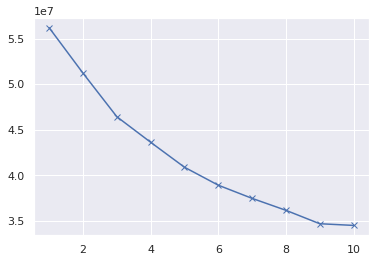

In [40]:
plt.plot(inertia['K'], inertia['Inertia'], 'bx-')

In [0]:
# Cluster sem PCA => 3? 4?
# Cluster com PCA => 8? 9?

In [0]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(df_pca)
clusters = kmeans.predict(df_pca)

In [0]:
df_resp = df2
df_resp['Segmento'] = clusters

In [50]:
df_resp['Segmento']

id
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849    1
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05    3
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08    3
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef    3
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f    0
                                                                   ..
f06d47d6332f6e49b73938a741bda9c02f38f641560dc27ea699b29489261e01    0
bcccb4259a5e211a143f4b124484f7db6d3c84c9c9c95278a1d51a2cb4554031    3
ad39dd645a1cb53241313742677c26f71764eb7ba604ded7ee55f1a18fafee41    1
ab10393979f07f6ab2ac13e7a5b48ab4e095a9dd806924ebd9f8f9097a28bb04    3
5456400237f9583de3be4b669ef19ba1fe13b0d74efbd6645856ab3b1c3b0bff    3
Name: Segmento, Length: 401870, dtype: int32